# Telco Customer Churn 

### Problem Statement

For any industries like Telecom, Banking etc., Customer churns is the major
problem which leads to the revenue issues. Having considered this issue top companies are likely to develop the
prediction algorithms to know the potential of the customers whether they
likely to continue or not.The researchers are suggesting to 
develop a churn prediction model which assists telecom operators to predict
customers who are most likely subject to churn.

Dataset: Source from Kaggle 

The dataset for "TELCO CUSTOMER CHURN" is having a single csv file 

The total 7043 no of rows and 21 features are present in this dataset


$ 4 Continuous and 17 categorical including the target variable "CHURN" are present in the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# baseline in performance with logistic regression model
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

##https://machinelearningmastery.com/autoencoder-for-classification/
# train autoencoder for classification with no compression in the bottleneck layer
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
from keras.models import load_model 

In [2]:
TCC=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
TCC.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
TCC.shape

(7043, 21)

In [5]:
TCC.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
TCC['TotalCharges'] = pd.to_numeric(TCC['TotalCharges'],errors='coerce')
TCC.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
TCC_1=TCC.copy()

In [8]:
TCC_1.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

## Explorative Data Analysis

### Categorical variables


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

https://seaborn.pydata.org/generated/seaborn.countplot.html

# Univariate Analysis

since we have more number of categorical variables widely used catplot will give us more insights on target variable 

we should look for all variables to draw most influenced features using univariate analysis

Main objective is to know the customers churn ie.,( 1/yes means churn and 0/no means no churn)

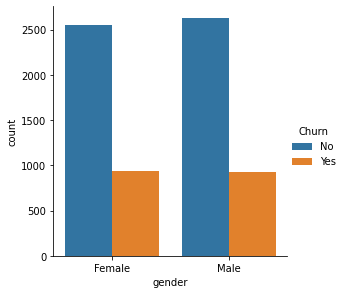

In [10]:
g = sns.catplot(x="gender", hue="Churn",
                data=TCC, kind="count",
                height=4, aspect=1)

Male and Female are having equal churns but we have no reason why they are churning, so we will check with other variables.

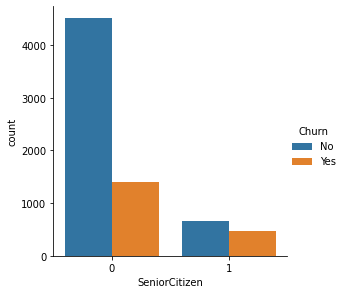

In [11]:
g = sns.catplot(x="SeniorCitizen", hue="Churn",
                data=TCC, kind="count",
                height=4, aspect=1)

Here 0 indicates Non senior citizen and 1 is senior citizen

Very few are churners from both 

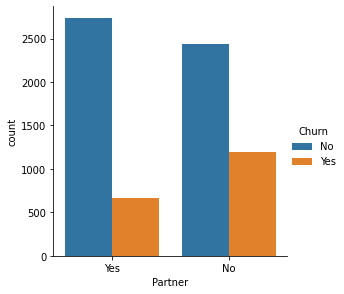

In [12]:
g = sns.catplot(x="Partner", hue="Churn",
                data=TCC, kind="count",
                height=4, aspect=1)

The one who had partneres are less churners and with no partner are high churners

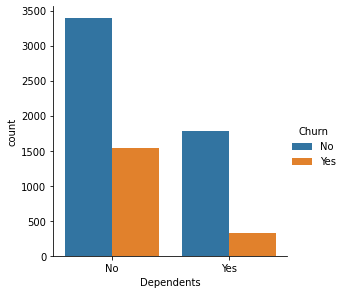

In [13]:
g = sns.catplot(x="Dependents", hue="Churn",
                data=TCC, kind="count",
                height=4, aspect=1)

Dependents are very less likely to churn then non dependents

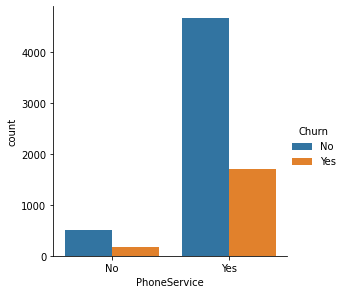

In [14]:
g = sns.catplot(x="PhoneService", hue="Churn",
                data=TCC, kind="count",
                height=4, aspect=1)

phoneservice customers are the highest churners comparatively

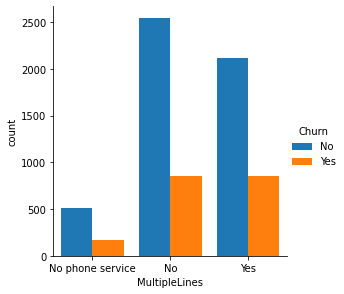

In [15]:
g = sns.catplot(x="MultipleLines", hue="Churn",
                data=TCC, kind="count",
                height=4, aspect=1,saturation=0.999)

From phoneservice we understood that most customers are having phoneservice in which we conclude here multiplelines and no multiplelines customers are equal churners

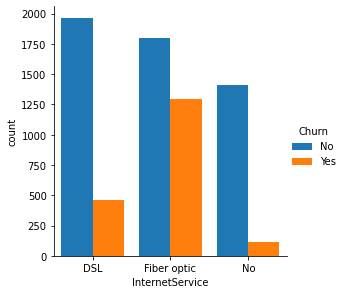

In [16]:
g = sns.catplot(x="InternetService", hue="Churn",
                data=TCC, kind="count",
                height=4, aspect=1,saturation=0.999)

From internet service fiberoptic customers are more churners

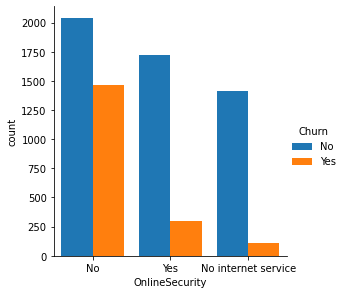

In [17]:
g = sns.catplot(x="OnlineSecurity", hue="Churn",
                data=TCC, kind="count",
                height=4, aspect=1,saturation=0.999)

Those who had no online security they are not likely to continue and no internet service customers are most loyal customers

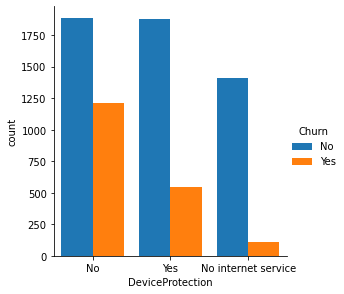

In [18]:
g = sns.catplot(x="DeviceProtection", hue="Churn",
                data=TCC, kind="count",
                height=4, aspect=1,saturation=0.999)

Obviously no one continues with the service without deviceprotection and same we can conclude here

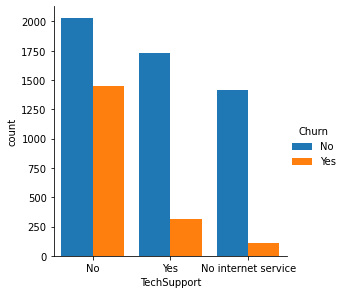

In [19]:
g = sns.catplot(x="TechSupport", hue="Churn",
                data=TCC, kind="count",
                height=4, aspect=1,saturation=0.999)

Again more churners are non tech support same as deviceprotecion,online security and internet service.

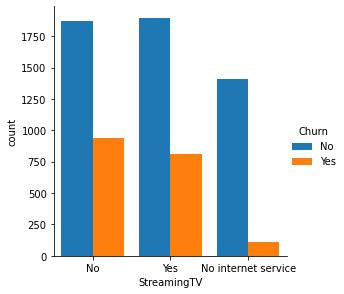

In [20]:
g = sns.catplot(x="StreamingTV", hue="Churn",
                data=TCC, kind="count",
                height=4, aspect=1,saturation=0.999)

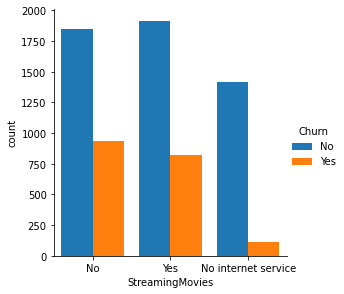

In [21]:
g = sns.catplot(x="StreamingMovies", hue="Churn",
                data=TCC, kind="count",
                height=4, aspect=1,saturation=0.999)

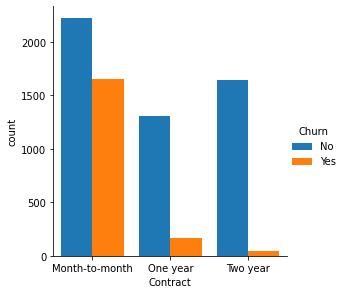

In [22]:
g = sns.catplot(x="Contract", hue="Churn",
                data=TCC, kind="count",
                height=4, aspect=1,saturation=0.999)

Customers with monthly subsciption are the higher churners

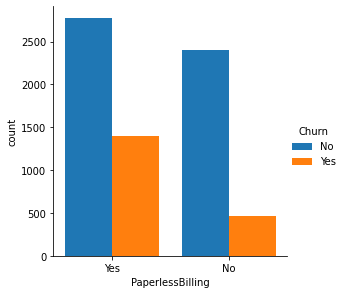

In [23]:
g = sns.catplot(x="PaperlessBilling", hue="Churn",
                data=TCC, kind="count",
                height=4, aspect=1,saturation=0.999)

Those who follows paperless billing they are very likely to continue compared to no paperless customers

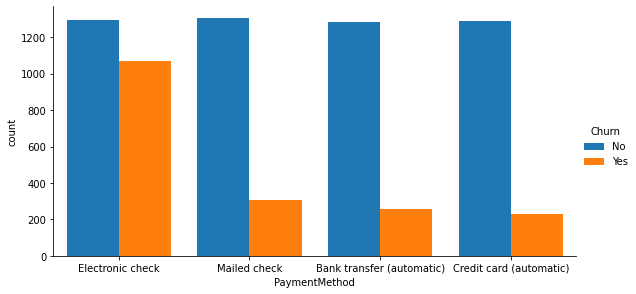

In [24]:
g = sns.catplot(x="PaymentMethod", hue="Churn",
                data=TCC, kind="count",
                height=4, aspect=2,saturation=0.999)

From payment method Electonic Check were the most churned customers when compared to mailed check, bank transfer and credit card

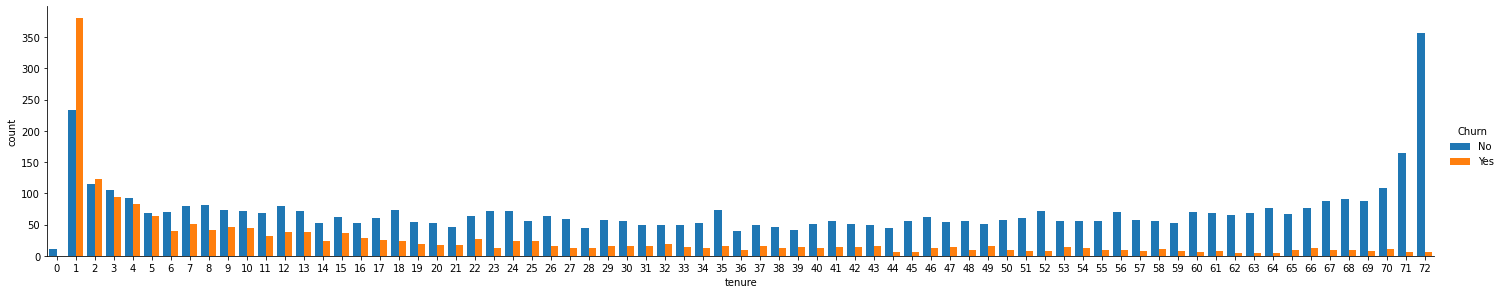

In [25]:
g = sns.catplot(x="tenure", hue="Churn",
                data=TCC, kind="count",
                height=4, aspect=5,saturation=0.999)

We cannot able visualize tenure properly , so lets group the tenure for 1 year in terms of months.

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: mnth_tenure_group2, dtype: int64


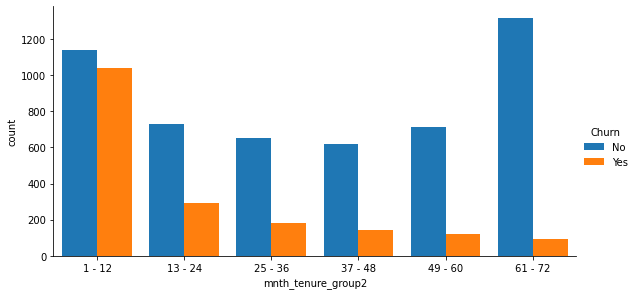

In [26]:
mnth_tenure_group = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

TCC_1['mnth_tenure_group2'] = pd.cut(TCC.tenure, range(1, 80, 12), right=False, labels=mnth_tenure_group)

print(TCC_1['mnth_tenure_group2'].value_counts())
g = sns.catplot(x="mnth_tenure_group2", hue="Churn",
                data=TCC_1, kind="count",
                height=4, aspect=2,saturation=0.999)

Here is an intresting thing the loyal customers are the long run customers, but most churners we observe from 1-12 months tenure only

In [27]:
TCC_1.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,mnth_tenure_group2
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1 - 12
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,13 - 24
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,1 - 12
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,25 - 36
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,61 - 72


CustomerID or name of the customers are the variables which cannot give any relationship between target and name of the customer

Hence we will remove those features which are not important.

In [28]:
TCC_1.shape
TCC_1.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

Now lets convert churn categorical into binary numbers

In [29]:
TCC_1['Churn'] = np.where(TCC_1.Churn == 'Yes',1,0)
TCC_1.head(20)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,mnth_tenure_group2
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,1 - 12
6,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,13 - 24
7,Female,0,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0,1 - 12
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,25 - 36
9,Male,0,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,61 - 72


In [30]:
TCC_1.shape

(7043, 20)

### Continuous variables

WE are having 2 most important continuous variables that lets the revenue to the company

So analysing those features are the most important to know by which the customers are not  likely to continue

Lets anlyze them by plotting using kde density plot by creating two columns with churns(1) and non churns(0)

In [31]:
churn_0=TCC_1['Churn'] == 0
churn_1=TCC_1['Churn'] == 1

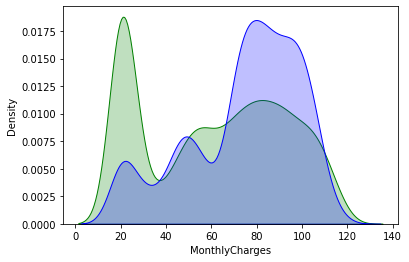

In [32]:
sns.kdeplot(TCC_1.MonthlyCharges[churn_0], color= 'green', shade= True,label= 'Churn: No',legend="non_churn")
sns.kdeplot(TCC_1.MonthlyCharges[churn_1], color= 'blue', shade= True,label= 'Churn: Yes',legend="churn")

Here if we observe carefully most churners are there in between 60 to 120 which indicates if monthly charges are high then churners are also high and very high customers are continuing with the service with less montly charges

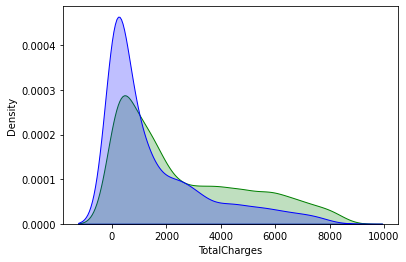

In [33]:
sns.kdeplot(TCC_1.TotalCharges[churn_0], color= 'green', shade= True,label= 'Churn: No')
sns.kdeplot(TCC_1.TotalCharges[churn_1], color= 'blue', shade= True,label= 'Churn: Yes')

Its clearly showing that its is linked with the three parameters of monthly charges ie., tenure, monthly and total charges.
Hence we draw a conlusion that high monthly charges with low tenure and total charges are he more churners.

Now All these factors let us understand that customers are most likely to churn due to high monthly charges with low tenure.

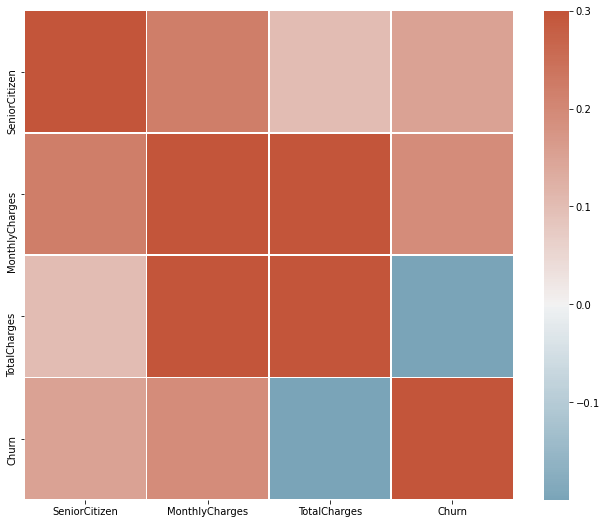

In [34]:
##https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr=TCC_1.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})

From the above correlation map we can conclude that most non senior citizen with high montly charges are the churners

# Bivariate Plotting

As of now we have seen individual categorical plotting to check the churners

Now lets see how two or more variables are influencing the target variables

Here i want to check only churn customers with two or more categorical variables, so i have separated churn and non curn customers separately for plotting.

Since gender i the common variable where every variable linked with we will put gender as target for churning customer and check all other variabels how they are influencing the customers to churn

https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/4170/code-walkthrough-seaborn-module-for-plotting-in-aiml/2/module-2-data-science-exploratory-data-analysis-and-data-visualization

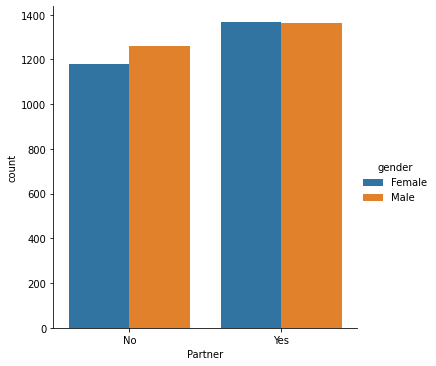

In [35]:
churn_00=TCC_1.loc[TCC_1['Churn'] == 0]
churn_10=TCC_1.loc[TCC_1['Churn'] == 1]
g= sns.catplot(data = churn_00, x= 'Partner', order=TCC['Partner'].value_counts().index,hue ='gender' ,kind='count',aspect=1) 

Here the plot is between partner and gender with non churners


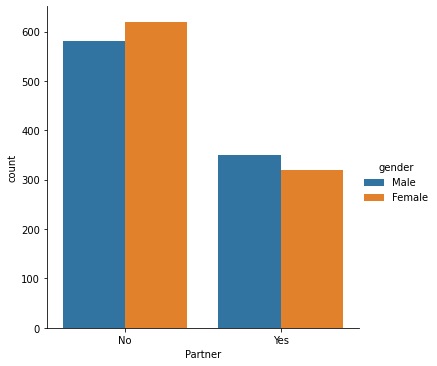

In [36]:
g = sns.catplot(data = churn_10, x= 'Partner', order=TCC['Partner'].value_counts().index,hue ='gender' ,kind='count',aspect=1) 

Most Churners are the customers with no partners of gender equally

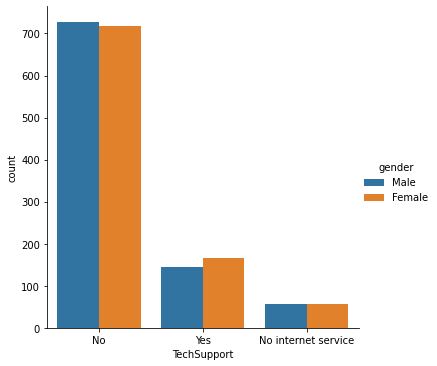

In [37]:
g= sns.catplot(data = churn_10, x= 'TechSupport', order=TCC['TechSupport'].value_counts().index,hue ='gender' ,kind='count',aspect=1) 

Same as univariate plot non tech support customers are the high churners

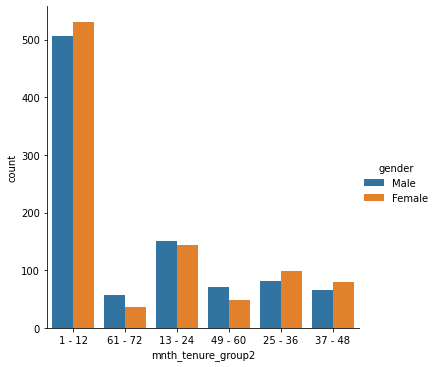

In [38]:
g= sns.catplot(data = churn_10, x= 'mnth_tenure_group2', order=TCC_1['mnth_tenure_group2'].value_counts().index,hue ='gender' ,kind='count',aspect=1) 

From this plot we can observe Female customers are slighlty higher than male within 1-12 months tenure who are churners 

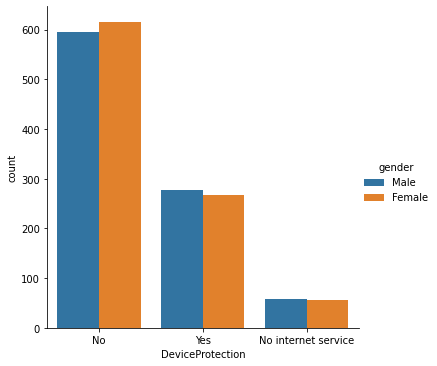

In [39]:
g = sns.catplot(data = churn_10, x= 'DeviceProtection', order=TCC['DeviceProtection'].value_counts().index,hue ='gender' ,kind='count',aspect=1) 

here customers with no device protecttion are the high churners comparatively

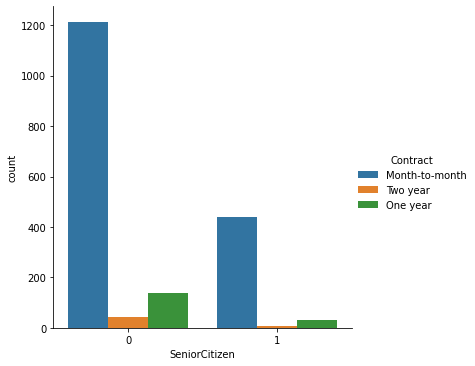

In [40]:
g = sns.catplot(data = churn_10, x= 'SeniorCitizen', order=TCC['SeniorCitizen'].value_counts().index,hue ='Contract' ,kind='count',aspect=1) 

Most Non seniorcitizens with monthly subscriptions are churners only 

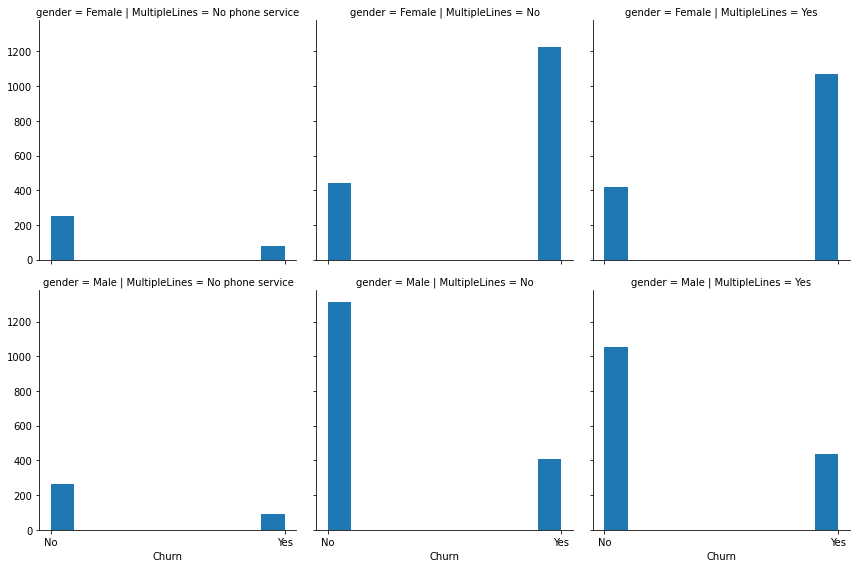

In [41]:
import numpy as np

bins = np.arange(0, 65, 3)

g = sns.FacetGrid(TCC, row="gender",  col = "MultipleLines" , height=4)
g = g.map(plt.hist, "Churn")

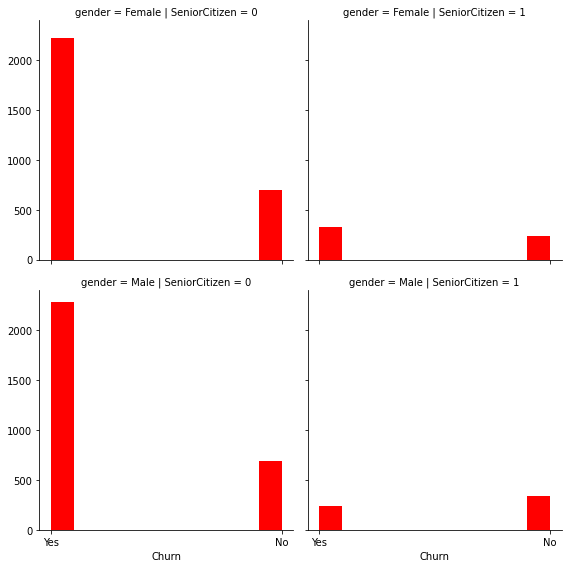

In [42]:
g = sns.FacetGrid(TCC, row="gender",  col = "SeniorCitizen" , height=4)
g = g.map(plt.hist, "Churn",color='Red')

Here in multivaraiate also we can observe high churners are the non senior citizen only 

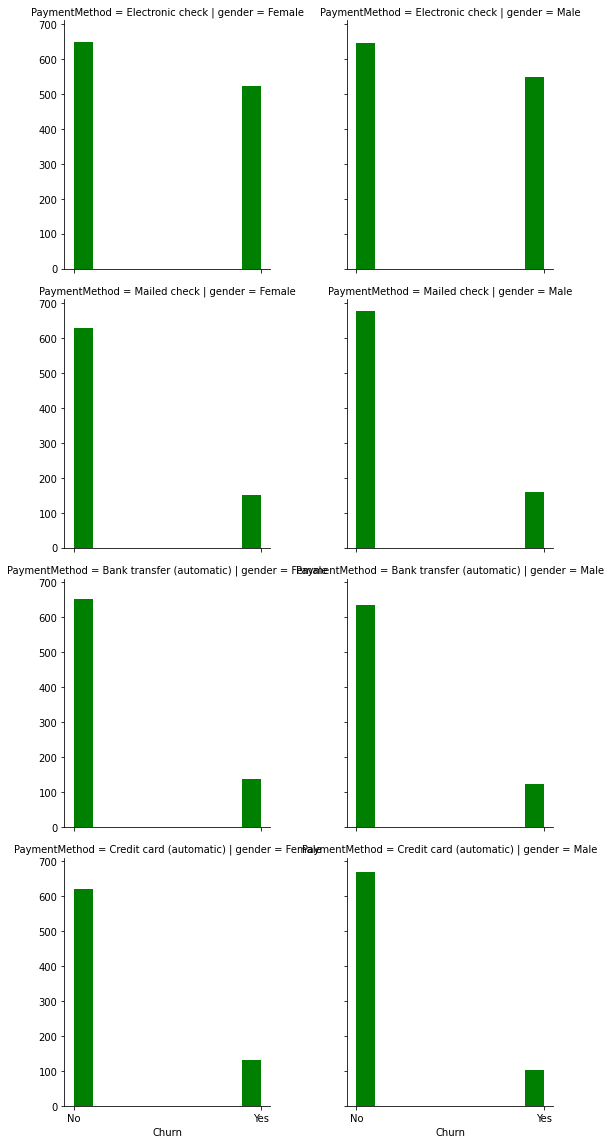

In [43]:
g = sns.FacetGrid(TCC, row="PaymentMethod",  col = "gender" , height=4)
g = g.map(plt.hist, "Churn",color='green')

As we seen in univariant analysis Electronc check in payment method are the high churners in both male and Female

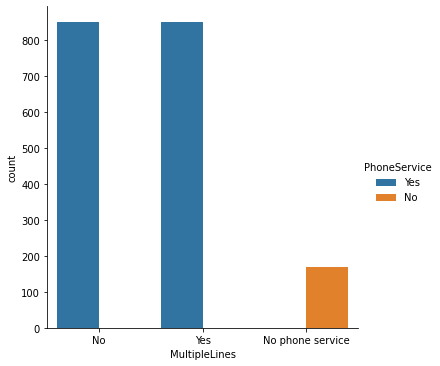

In [44]:
g = sns.catplot(data = churn_10, x= 'MultipleLines', order=TCC['MultipleLines'].value_counts().index,hue ='PhoneService' ,kind='count',aspect=1) 

More intresting insight is customers with no multiplelines and with phoneservice and also with multiple lines and phoneservice are likely churners

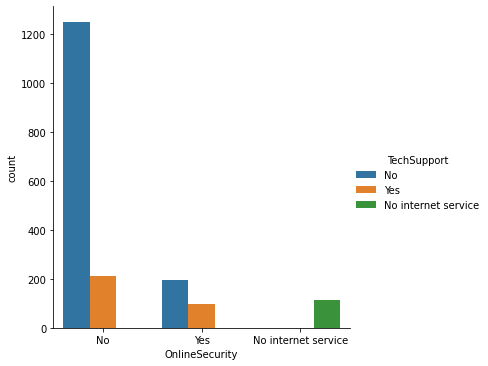

In [45]:
g = sns.FacetGrg = sns.catplot(data = churn_10, x= 'OnlineSecurity', order=TCC['OnlineSecurity'].value_counts().index,hue ='TechSupport',kind='count',aspect=1) 

customers with no tech support and online security are the high churners and also with techsupport but no online security

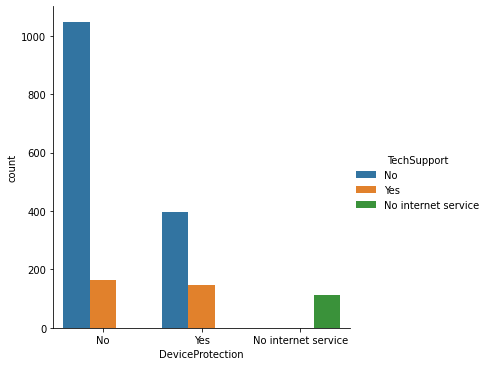

In [46]:
g = sns.FacetGrg = sns.catplot(data = churn_10, x= 'DeviceProtection', order=TCC['DeviceProtection'].value_counts().index,hue ='TechSupport',kind='count',aspect=1) 

Customers with no device protection and no tech support the high churners Comparteively

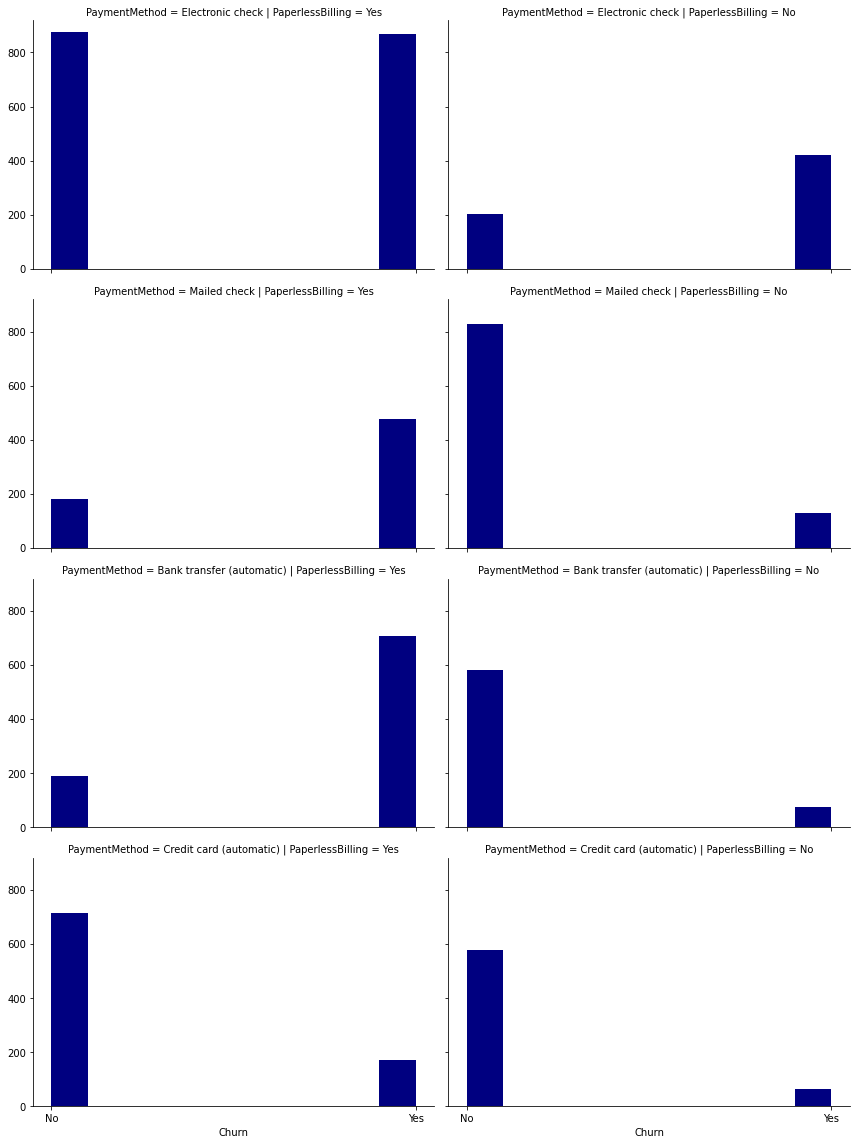

In [47]:
g = sns.FacetGrid(TCC, row="PaymentMethod",  col = "PaperlessBilling" , height=4,aspect=1.5
                 )
g = g.map(plt.hist, "Churn",color='navy')

Many customers are the high churners from the electronic check with paperless billing only

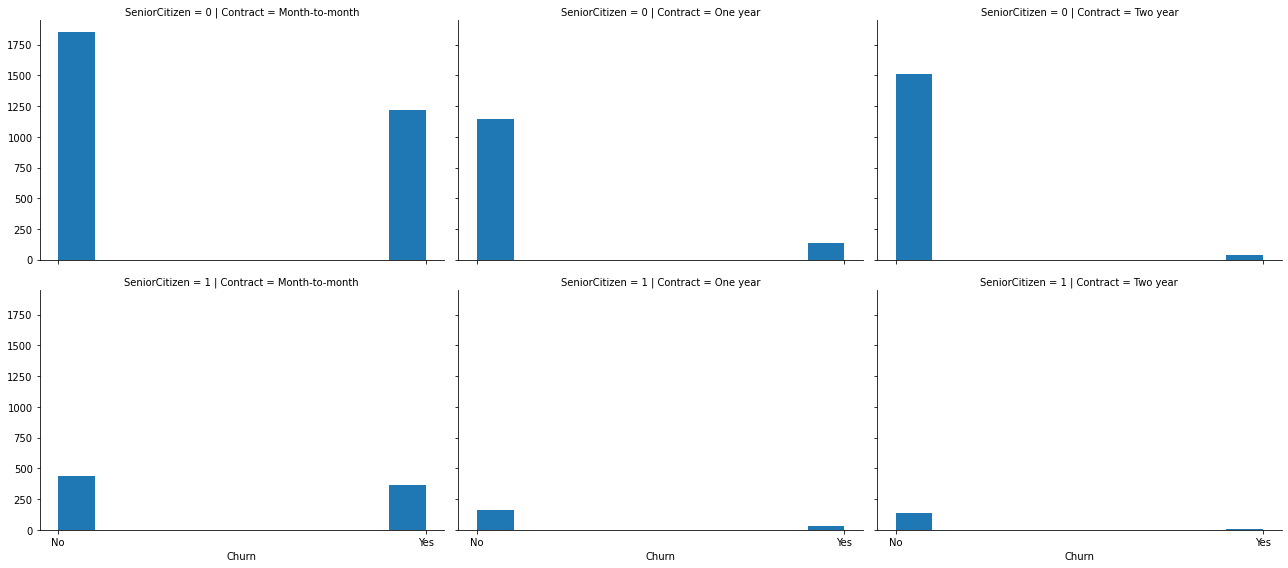

In [48]:
g = sns.FacetGrid(TCC, row="SeniorCitizen",  col = "Contract" , height=4,aspect=1.5)
g = g.map(plt.hist, "Churn")

Non Senior citizen in Month to month are the high churners when compared to others

## Final Conclusion:

From the above Univariate and bivariate analysis we can conclude that churners are mostly from :

Non senior citizens , contract with monthly of high month charges and falling under 1-12 months.

Customers with no tech support, no online security and electronic check payment method are the high churners

Multiple liners with phoneservice and paperless billing customers are the high churners.

## Now lets discuss on the insights

<pre>Types of customers are:
1.Senior citizen and non senior citizen
2.Male and Female
This two parameters are univerasal </pre>


<pre> Company will offer different services like 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling' 
       'TotalCharges
  If all the services mentioned above if availed by the customeres they will most likey to conitnue</pre>

<pre>
The highly churned customers are the one who is not able to get the services as mentioned above
</pre>

# Feature Importance

In [49]:
##To find top 5 feature https://github.com/pik1989/MLProject-ChurnPrediction/blob/main/Churn%20Analysis%20-%20Model%20Building.ipynb
#Converting all Categorical values into numeric using onehot encoding
data_dummy = pd.get_dummies(TCC_1)
data_dummy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,mnth_tenure_group2_1 - 12,mnth_tenure_group2_13 - 24,mnth_tenure_group2_25 - 36,mnth_tenure_group2_37 - 48,mnth_tenure_group2_49 - 60,mnth_tenure_group2_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [50]:
data_dummy.dropna(how = 'any', inplace = True)


In [51]:
# Here dropping target variable for splitting input and output data for applying model
input=data_dummy.drop('Churn',axis=1)
input

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,mnth_tenure_group2_1 - 12,mnth_tenure_group2_13 - 24,mnth_tenure_group2_25 - 36,mnth_tenure_group2_37 - 48,mnth_tenure_group2_49 - 60,mnth_tenure_group2_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0


In [52]:
target=data_dummy['Churn']
target


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [53]:
# splitting train and test data
x_train,x_test,y_train,y_test=train_test_split(input,target,test_size=0.2)

In [54]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5625, 50)
(5625,)
(1407, 50)
(1407,)


In [55]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [56]:
RF_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [57]:
prediction=RF_model.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
RF_model.score(x_test,y_test)

0.7882018479033405

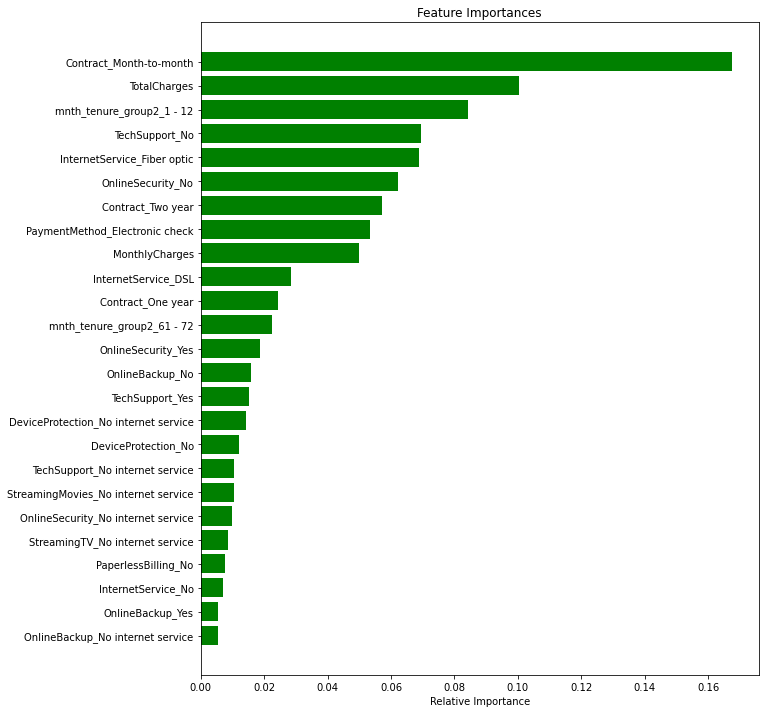

In [59]:
## Reference from my course Facebook assignment 
features = x_train.columns
importances = RF_model.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<pre> Conclusion
Top 5 features are as follows:
    1. Contract month to month
    2.Month tenure group in between 1-12
    3.Total Charges
    4.NO online security
    5.NO Tech support
<pre/> 

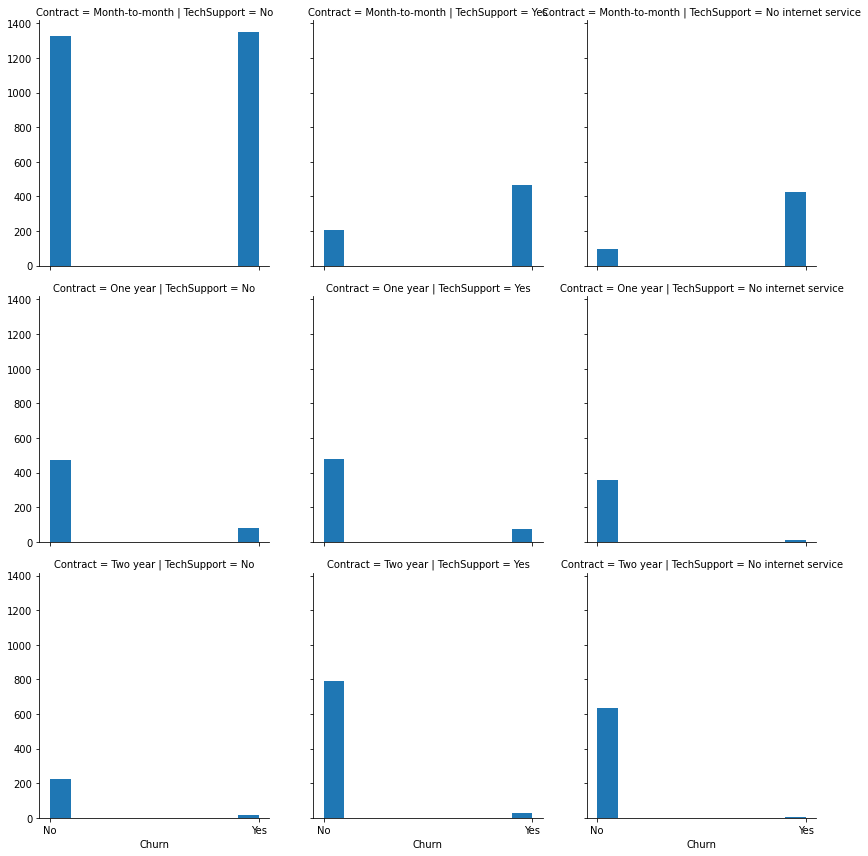

In [60]:
g = sns.FacetGrid(TCC, row="Contract",  col = "TechSupport" , height=4,aspect=1)
g = g.map(plt.hist, "Churn")

From the above plot its clearly dipicting that month-month contrt customers are the high churners with respect to no tech support

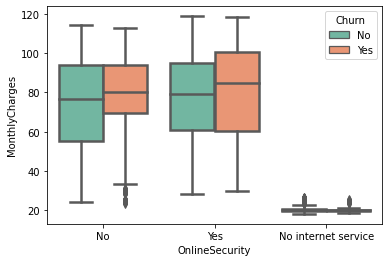

In [61]:
## https://seaborn.pydata.org/generated/seaborn.boxplot.html
ax = sns.boxplot(x="OnlineSecurity", y="MonthlyCharges", hue="Churn",
                 data=TCC, palette="Set2",linewidth=2.5,orient="v")

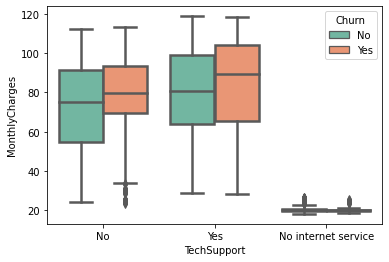

In [62]:
ax = sns.boxplot(x="TechSupport", y="MonthlyCharges", hue="Churn",
                 data=TCC, palette="Set2",linewidth=2.5,orient="v")

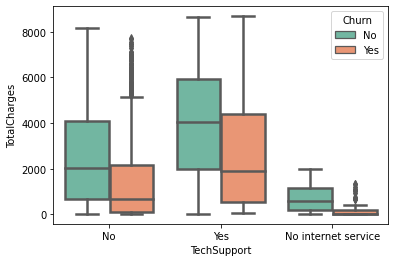

In [63]:
ax = sns.boxplot(x="TechSupport", y="TotalCharges", hue="Churn",
                 data=TCC, palette="Set2",linewidth=2.5,orient="v")

From the above three boxplot we can observe that the monthly charges and total chargesIts clearly showing that its is linked with the three parameters of monthly charges ie., tenure, monthly and total charges. Hence we draw a conlusion that high monthly charges with low tenure and total charges are he more churners.

# Feature Engineering

AutoEncoding and Decoding 

https://machinelearningmastery.com/autoencoder-for-classification/#:~:text=Autoencoder%20is%20a%20type%20of,version%20provided%20by%20the%20encoder.

## **WIthout** **Sampling**

In [64]:
# scale data
scale_input = MinMaxScaler()
scale_input.fit(x_train)
X_train = scale_input.transform(x_train)
X_test = scale_input.transform(x_test)

In [165]:
# encoder level 1
num_of_inputs=50
encoder= Input(shape=(num_of_inputs,))
encoding = Dense(32)(encoder)
encoding = BatchNormalization()(encoding)
encoding = LeakyReLU()(encoding)
# encoder level 2
encoding = Dense(16)(encoding)
encoding = BatchNormalization()(encoding)
encoding = LeakyReLU()(encoding)
# bottleneck
n_bottleneck_features =8
bottleneck_features = Dense(n_bottleneck_features)(encoding)

In [166]:
# define decoder, level 1
decoding = Dense(8)(bottleneck_features)
decoding = BatchNormalization()(decoding)
decoding = LeakyReLU()(decoding)
# decoder level 2
decoding  = Dense(16)(decoding )
decoding  = BatchNormalization()(decoding )
decoding  = LeakyReLU()(decoding )
# output layer
decoding = Dense(32)(decoding )
Decoder=Dense(50,activation='linear')(decoding )

In [167]:
# define autoencoder model
model = Model(inputs=encoder, outputs=Decoder)

In [168]:
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense_40 (Dense)             (None, 32)                1632      
_________________________________________________________________
batch_normalization_26 (Batc (None, 32)                128       
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 32)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 16)                528       
_________________________________________________________________
batch_normalization_27 (Batc (None, 16)                64        
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 16)                0  

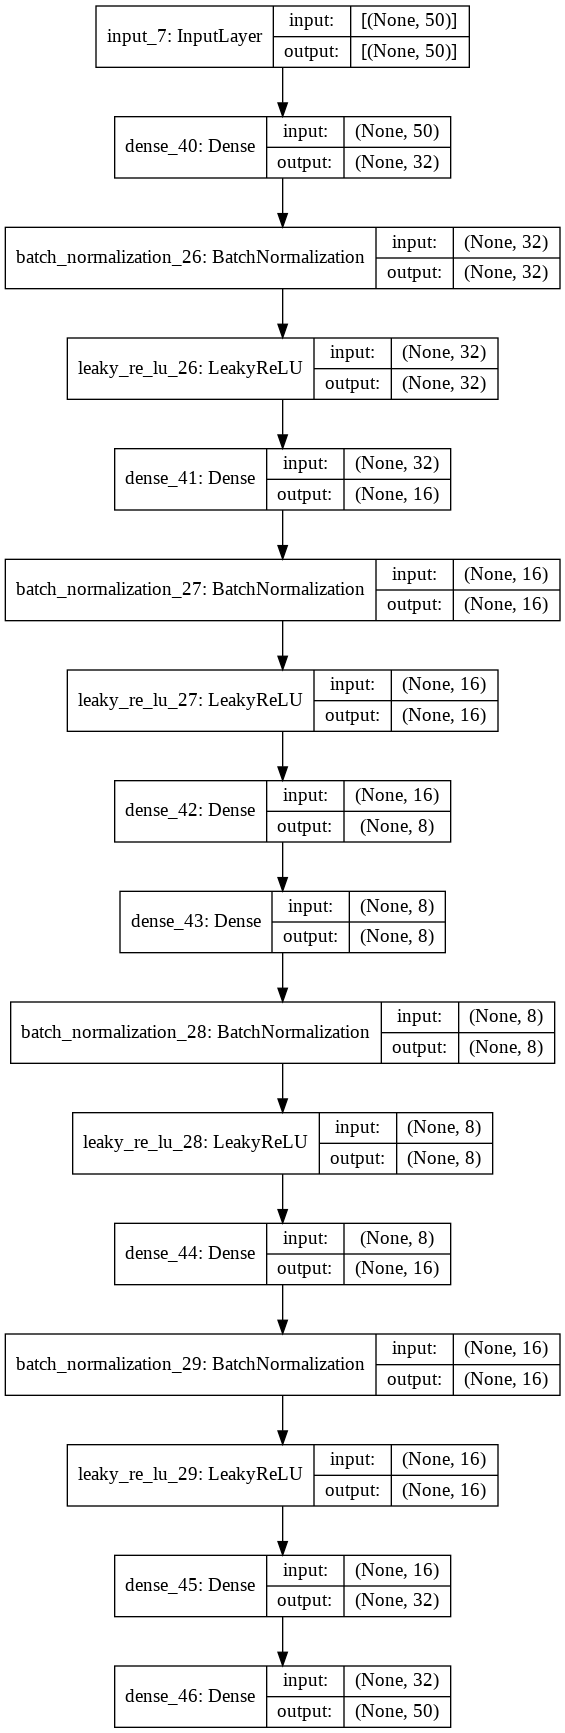

In [169]:
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

In [170]:
#model.compile(optimizer='adam', loss='categorical_crossentropy')
model.compile(loss='mse',
              optimizer='Adam',
              )

In [171]:
# fit the autoencoder model to reconstruct input
Auto_E_D = model.fit(x_train, y_train, epochs=100, batch_size=16, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
352/352 [==============================] - 2s 3ms/step - loss: 0.2305 - val_loss: 0.1977
Epoch 2/100
352/352 [==============================] - 1s 2ms/step - loss: 0.1573 - val_loss: 0.2412
Epoch 3/100
352/352 [==============================] - 1s 2ms/step - loss: 0.1489 - val_loss: 0.2295
Epoch 4/100
352/352 [==============================] - 1s 2ms/step - loss: 0.1454 - val_loss: 0.1778
Epoch 5/100
352/352 [==============================] - 1s 2ms/step - loss: 0.1389 - val_loss: 0.1860
Epoch 6/100
352/352 [==============================] - 1s 2ms/step - loss: 0.1427 - val_loss: 0.1647
Epoch 7/100
352/352 [==============================] - 1s 2ms/step - loss: 0.1444 - val_loss: 0.1796
Epoch 8/100
352/352 [==============================] - 1s 2ms/step - loss: 0.1417 - val_loss: 0.1792
Epoch 9/100
352/352 [==============================] - 1s 2ms/step - loss: 0.1435 - val_loss: 0.1643
Epoch 10/100
352/352 [==============================] - 1s 2ms/step - loss: 0.1450 - val_lo

In [172]:
encoder_1 = Model(inputs=encoder, outputs=bottleneck_features )

In [173]:
encoder_1.save('encoder.h5')

In [174]:
encoder_1 = load_model('encoder.h5')

In [175]:
X_train_encoder = encoder_1.predict(x_train)

In [176]:
X_test_encoder = encoder_1.predict(x_test)

In [177]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
# fit the model on the training set
model_1.fit(X_train_encoder, y_train)
# make predictions on the test set
yhat = model_1.predict(X_test_encoder)

In [178]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, yhat)
print(acc)

0.7903340440653873


# Random Model

In [156]:
from sklearn.metrics import plot_confusion_matrix

In [179]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_encoder = X_test_encoder.shape[0]
# Test-Set error.
#we create a output array that has exactly same as the test data
test_pred_encoder = np.zeros((test_data_encoder,2))
for i in range(test_data_encoder ):
    random_probability = np.random.rand(1,2)
    test_pred_encoder[i] = ((random_probability/sum(sum(random_probability)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_pred_encoder, eps=1e-15))

Log loss on Test Data using Random Model 0.8833004246881816


## **Applying Encoders and decoders to have encoded input with Samplling using SMOTEENN**




In [180]:
##https://github.com/pik1989/MLProject-ChurnPrediction
from imblearn.combine import SMOTEENN
sample_data = SMOTEENN()
X_resampled, y_resampled = sample_data.fit_sample(input,target)

In [181]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [182]:
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(4694, 50)
(1174, 50)
(4694,)
(1174,)


In [192]:
num_of_inputs1=50
encoder1= Input(shape=(num_of_inputs1,))
encoding1 = Dense(32)(encoder1)
encoding1 = BatchNormalization()(encoding1)
encoding1 = LeakyReLU()(encoding1)
# encoder level 2
encoding1 = Dense(16)(encoding1)
encoding1 = BatchNormalization()(encoding1)
encoding1 = LeakyReLU()(encoding1)
# bottleneck
n_bottleneck_features1 =8
bottleneck_features1 = Dense(n_bottleneck_features1)(encoding1)

In [193]:
# define decoder, level 1
decoding1 = Dense(8)(bottleneck_features1)
decoding1 = BatchNormalization()(decoding1)
decoding1 = LeakyReLU()(decoding1)
# decoder level 2
decoding1  = Dense(16)(decoding1)
decoding1 = BatchNormalization()(decoding1)
decoding1  = LeakyReLU()(decoding1)
# output layer
decoding1 = Dense(32)(decoding1)
Decoder1=Dense(50,activation='linear')(decoding1)


In [194]:
# define autoencoder model
model1 = Model(inputs=encoder1, outputs=Decoder1)

In [195]:
model1.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 50)]              0         
_________________________________________________________________
dense_65 (Dense)             (None, 32)                1632      
_________________________________________________________________
batch_normalization_40 (Batc (None, 32)                128       
_________________________________________________________________
leaky_re_lu_40 (LeakyReLU)   (None, 32)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 16)                528       
_________________________________________________________________
batch_normalization_41 (Batc (None, 16)                64        
_________________________________________________________________
leaky_re_lu_41 (LeakyReLU)   (None, 16)                0  

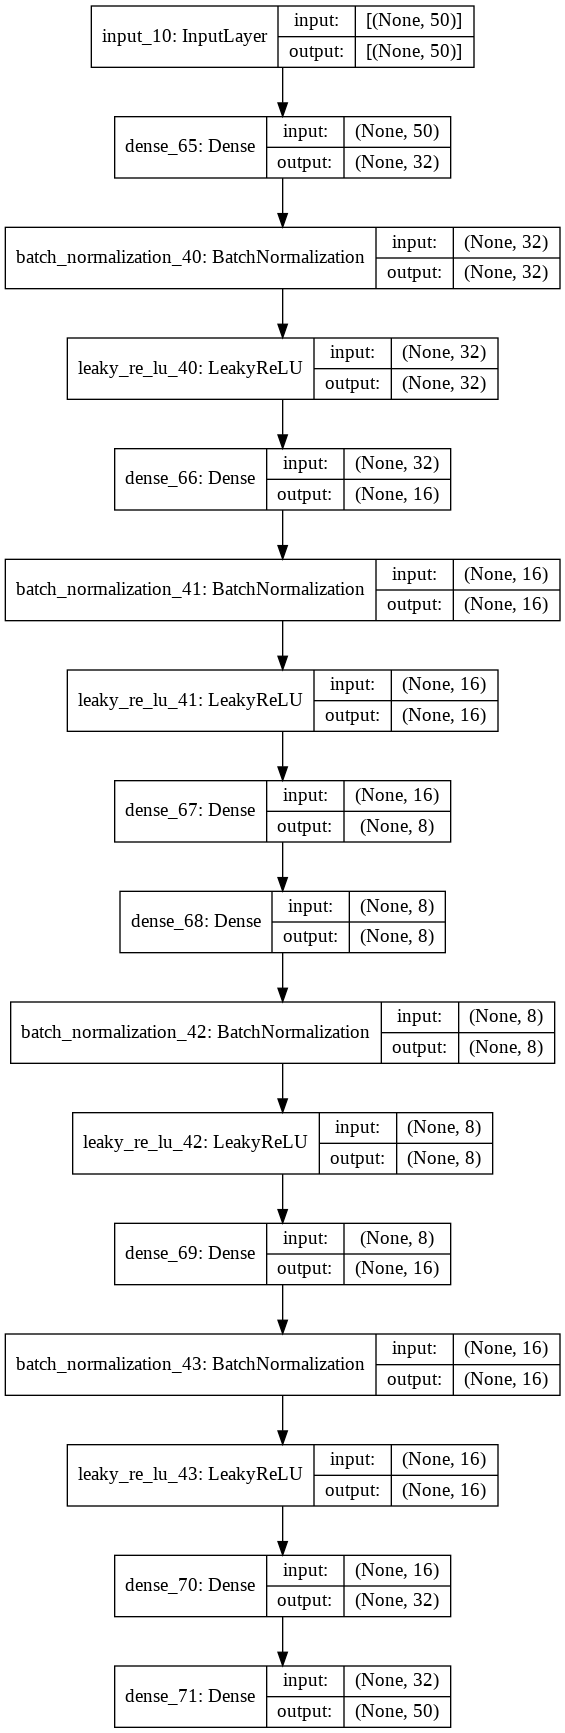

In [197]:
plot_model(model1, 'autoencoder_no_compress.png', show_shapes=True)

In [198]:
model1.compile(loss='mse',
              optimizer='Adam',
              )

In [201]:
# fit the autoencoder model to reconstruct input
Auto_E_D1 = model1.fit(x_train1, y_train1, epochs=50, batch_size=16, verbose=1, validation_data=(x_test1, y_test1))

Epoch 1/50
294/294 [==============================] - 1s 2ms/step - loss: 0.0779 - val_loss: 0.0668
Epoch 2/50
294/294 [==============================] - 1s 2ms/step - loss: 0.0799 - val_loss: 0.0679
Epoch 3/50
294/294 [==============================] - 1s 2ms/step - loss: 0.0769 - val_loss: 0.0806
Epoch 4/50
294/294 [==============================] - 1s 2ms/step - loss: 0.0798 - val_loss: 0.1217
Epoch 5/50
294/294 [==============================] - 1s 2ms/step - loss: 0.0818 - val_loss: 0.0899
Epoch 6/50
294/294 [==============================] - 1s 2ms/step - loss: 0.0779 - val_loss: 0.0626
Epoch 7/50
294/294 [==============================] - 1s 2ms/step - loss: 0.0794 - val_loss: 0.0708
Epoch 8/50
294/294 [==============================] - 1s 2ms/step - loss: 0.0785 - val_loss: 0.0928
Epoch 9/50
294/294 [==============================] - 1s 2ms/step - loss: 0.0767 - val_loss: 0.0775
Epoch 10/50
294/294 [==============================] - 1s 2ms/step - loss: 0.0792 - val_loss: 0.0940

In [202]:
encoder_11 = Model(inputs=encoder1, outputs=bottleneck_features1 )

In [203]:
encoder_11.save('encoder1.h5')

In [204]:
encoder_11 = load_model('encoder1.h5')

In [205]:
X_train_encoder1 = encoder_11.predict(x_train1)

In [206]:
X_test_encoder1 = encoder_11.predict(x_test1)

In [207]:
from sklearn.linear_model import LogisticRegression
model_11 = LogisticRegression()
# fit the model on the training set
model_11.fit(X_train_encoder1, y_train1)
# make predictions on the test set
yhat1 = model_11.predict(X_test_encoder1)

In [210]:
from sklearn.metrics import accuracy_score
acc1= accuracy_score(y_test1, yhat1)
print(acc1)

0.909710391822828


In [211]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_encoder1 = X_test_encoder1.shape[0]
# Test-Set error.
#we create a output array that has exactly same as the test data
test_pred_encoder1 = np.zeros((test_data_encoder1,2))
for i in range(test_data_encoder1 ):
    random_probability = np.random.rand(1,2)
    test_pred_encoder[i] = ((random_probability/sum(sum(random_probability)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test1,test_pred_encoder1, eps=1e-15))

Log loss on Test Data using Random Model 0.6931471805599453


Conclusion: (Without Sampling)

1.With autoencoders obtained encoded or compressed input to further apply the ML models

2.Applied Logistic Regression And obtained 80 % accuracy

3.Later Applied Random model and obtained the log loss of 89 %
 




Conclusion: (With Sampling)

1. With autoencoders obtained encoded or compressed input to further apply the ML models

2. Applied Logistic Regression and obtained 91 % Accuracy

3. Then with Random model we get only 69 % logg loss

# Modelling

# Without hyperparameter Tunning